In [1]:
function accuracy()
    ac=2500;
    return ac;
end
setprecision(accuracy());

In [2]:
function order()
    M=650;
    return M+1;
end

order (generic function with 1 method)

In [3]:
function steps()
    h = BigFloat(1)/BigFloat(100)
    return h;
end

steps (generic function with 1 method)

In [4]:
function JCh(k,i)
     
    k = BigFloat(k);
    i = BigFloat(i);
    s = BigFloat(1);
    if i < k/2
        i = k - i;
    end
    for j in range(k,i+1,step=-1)
        
        j1=BigFloat(j)
        s = s*j1/(j1-i)
        
    end
    
    return s
end

JCh (generic function with 1 method)

In [5]:
function DJCh()
    Cki = Array{BigFloat}(undef,order()-1,order()-1);
    for k in 1:order()-1
        for j in 1:k
            Cki[k,j] = 1
        end
    end
    
    for k in 2:order()-2
        for i in 1:k-1
           Cki[k+1,i+1] = Cki[k,i] + Cki[k,i+1]
        end
    end
    return Cki
end

DJCh (generic function with 1 method)

In [6]:
function multi()
    S = Array{BigFloat}(undef,1,order());
    S[1] = BigFloat(1)
    
    for i in 1:order()-1
        S[i+1] = S[i]*steps()/BigFloat(i)
    end
    
    return S
end

multi (generic function with 1 method)

In [7]:
fdot(x,y,z) = @. x*y*z
function Sumxyz(x,y,Cki)
    return sum(fdot(Cki[1:end],reverse!(x[1:end]),y[1:end]))
end 

Sumxyz (generic function with 1 method)

In [8]:
function Talor(x,y,z,Cki)
    for k in 1:order()-1
        x[k+1] = a*(y[k] - x[k])
        y[k+1] = (c-a)*x[k] - Sumxyz(x[1:k],z[1:k],Cki[k,1:k]) + c*y[k]
        z[k+1] = Sumxyz(x[1:k],y[1:k],Cki[k,1:k]) - b*z[k]
    end
    
    return x,y,z
end

Talor (generic function with 1 method)

In [9]:
function Iteration(x,y,z,Cki)
    
    for st in 1:Times
    
        x,y,z = Talor(x,y,z,Cki)
        
        x[1] = sum(x[1:end].*Dmulti[1:end])
        y[1] = sum(y[1:end].*Dmulti[1:end])
        z[1] = sum(z[1:end].*Dmulti[1:end])
    
        Lorenz[st,:] = [x[1],y[1],z[1]] 
        Lorenzf[st,:] = convert.(Float32,Lorenz[st,:])
          
        if mod(st,500) == 0
            println(st,") ","time=",convert(Float16,st*steps()),": ",Lorenzf[st,:])
        end
    end
    
    return Lorenz
    
end

Iteration (generic function with 1 method)

In [10]:
Times = 100*500;      

a =  BigFloat(40);
b =  BigFloat(3);
c =  BigFloat(28)

x = Array{BigFloat}(undef,order())
y = Array{BigFloat}(undef,order())
z = Array{BigFloat}(undef,order())

Lorenz = Array{BigFloat}(undef,Times,3);
HH = Array{BigFloat}(undef,Times,3);
Ep = Array{BigFloat}(undef,Times,1);
Lorenzf = Array{Float32}(undef,Times,3);
Dmulti = Array{BigFloat}(undef,1,order());
Cki = Array{BigFloat}(undef,order()-1,order()-1);

x[1] = -BigFloat(1)/BigFloat(10); 
y[1] = BigFloat(1)/BigFloat(2); 
z[1] = -BigFloat(6)/BigFloat(10);

Cki = DJCh();
Dmulti = multi();

In [11]:
HH = Iteration(x,y,z,Cki);

500) time=5.0: Float32[7.9815235, 6.778181, 19.308191]
1000) time=10.0: Float32[8.769296, 7.7548385, 19.403467]
1500) time=15.0: Float32[2.9865592, 2.426224, 15.197132]
2000) time=20.0: Float32[12.364901, 11.263921, 21.971258]
2500) time=25.0: Float32[-2.569045, -1.5970546, 16.218672]
3000) time=30.0: Float32[-4.007982, -4.6272674, 11.673595]
3500) time=35.0: Float32[-7.843328, -2.7605023, 25.886568]
4000) time=40.0: Float32[5.8456645, 6.2677875, 17.456865]
4500) time=45.0: Float32[-9.56594, -6.0685387, 24.217686]
5000) time=50.0: Float32[4.571715, 4.7135406, 14.455404]
5500) time=55.0: Float32[-9.504108, -10.104606, 16.541582]
6000) time=60.0: Float32[6.086997, 6.718268, 14.487722]
6500) time=65.0: Float32[-4.13827, -3.5168169, 15.934503]
7000) time=70.0: Float32[4.8962836, 3.6921105, 19.190289]
7500) time=75.0: Float32[8.614792, 9.159214, 15.911057]
8000) time=80.0: Float32[-0.675626, -1.0419679, 12.186914]
8500) time=85.0: Float32[7.333674, 8.31331, 13.957123]
9000) time=90.0: Float

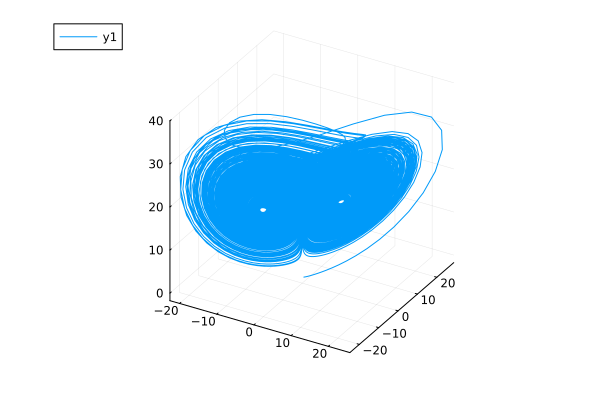

In [12]:
using Plots; 
plot(HH[1:end,1],HH[1:end,2],HH[1:end,3])